### Homework
In this homework, we will use Credit Card Data from the previous homework. <br>

Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

## Question 1
- Install Pipenv
- What's the version of pipenv you installed?
- Use --version to find out

ans: version 2022.9.24

## Question 2
- Use Pipenv to install Scikit-Learn version 1.0.2
- What's the first hash for scikit-learn you get in Pipfile.lock? 
- Note: you should create an empty folder for homework and do it there.

ans: sha256:08ef968f6b72033c16c479c966bf37ccd49b06ea91b765e1cc27afefe723920b

### Models
We've prepared a dictionary vectorizer and a model. <br>

They were trained (roughly) using this code: <br>

features = ['reports', 'share', 'expenditure', 'owner'] <br>
dicts = df[features].to_dict(orient='records') <br>

dv = DictVectorizer(sparse=False) <br>
X = dv.fit_transform(dicts) <br>

model = LogisticRegression(solver='liblinear').fit(X, y) <br>
- Note: You don't need to train the model. This code is just for your reference.

And then saved with Pickle. Download them: <br>

### Question 3
Let's use these models! <br>

- Write a script for loading these models with pickle
- Score this client:
{"reports": 0, "share": 0.001694, "expenditure": 0.12, "owner": "yes"}

In [2]:
import pickle

with open( 'model1.bin', 'rb') as f_in:
    model = pickle.load(f_in)
f_in.close()

with open('dv.bin', 'rb') as f_in1:
    div=pickle.load(f_in1)
f_in1.close()

C:\Users\Asia\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Asia\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DictVectorizer from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
client= {"reports": 0, "share": 0.001694, "expenditure": 0.12, "owner": "yes"}
client_dv=div.transform(client)
prediction=model.predict_proba(client_dv)[:,1]
print("Probability of getting a credit card (Script)" , str(prediction))


Probability of getting a credit card (Script) [0.16213414]


### Question 4
Now let's serve this model as a web service <br>

- Install Flask and gunicorn (or waitress, if you're on Windows)
- Write Flask code for serving the model
- Now score this client using requests:
- url = "YOUR_URL"
- client = {"reports": 0, "share": 0.245, "expenditure": 3.438, "owner": "yes"}
- requests.post(url, json=client).json()

<code>
    
import pickle

from flask import Flask
from flask import request
from flask import jsonify


model_file = 'model1.bin'
dict_v='dv.bin'

with open(model_file, 'rb') as f_in:
    model = pickle.load(f_in)

with open(dict_v, 'rb') as f_in1:
    dict_vict = pickle.load(f_in1)


app = Flask('credit-card')

@app.route('/predict_card', methods=['POST'])
def predict_card():
    customer = request.get_json()

    X = dict_vict.transform([customer])
    y_pred = model.predict_proba(X)[0, 1]
    crdit = y_pred >= 0.5

    result = {
        'credit_card_probability': float(y_pred),
        'credit_card': bool(crdit)
    }

    return jsonify(result)


if __name__ == "__main__":
    app.run(debug=True, host='0.0.0.0', port=9696)
    
</code>

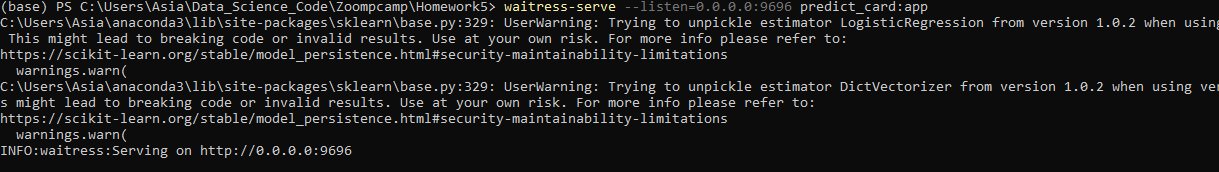

In [6]:
from IPython import display
display.Image(r"C:\Users\Asia\Downloads\sn1.PNG")

In [10]:
import requests


url = 'http://localhost:9696/predict'
client_id = 'xyz-123'

client = {"reports": 0, "share": 0.245, "expenditure": 3.438, "owner": "yes"}


response = requests.post(url, json=client) ## post the customer information in json format
result = response.json() ## get the server response
print(result)



{'credit_card': True, 'credit_card_probability': 0.9282218018527452}


ans: 0.9282218018527452

### Docker
Install Docker. We will use it for the next two questions. <br>

For these questions, we prepared a base image: svizor/zoomcamp-model:3.9.12-slim. You'll need to use it (see Question 5 for an example). <br>

This image is based on python:3.9.12-slim and has a logistic regression model (a different one) as well a dictionary vectorizer inside. <br>

This is how the Dockerfile for this image looks like: <br>

<code>
FROM python:3.9.12-slim 
WORKDIR /app  
COPY ["model2.bin", "dv.bin", "./"]  
</code>


We already built it and then pushed it to svizor/zoomcamp-model:3.9.12-slim. <br>

- Note: You don't need to build this docker image, it's just for your reference.

### Question 5
Download the base image svizor/zoomcamp-model:3.9.12-slim. You can easily make it by using docker pull command.

- So what's the size of this base image?

- You can get this information when running docker images - it'll be in the "SIZE" column.


ans: 125 MB
    

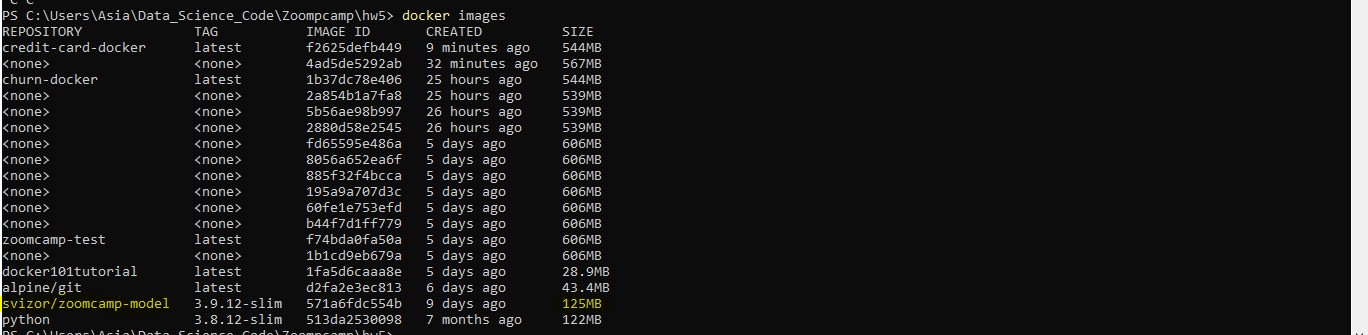

In [16]:
from IPython import display
display.Image(r"C:\Users\Asia\Downloads\sn3.PNG")


### Dockerfile
Now create your own Dockerfile based on the image we prepared. <br>

It should start like that: 

<code>
FROM svizor/zoomcamp-model:3.9.12-slim
# add your stuff here
</code>

Now complete it: <br>

- Install all the dependencies form the Pipenv file
- Copy your Flask script
- Run it with Gunicorn
- After that, you can build your docker image.


### Question 6

Let's run your docker container! <br>

After running it, score this client once again:
<code>
url = "YOUR_URL"
client = {"reports": 0, "share": 0.245, "expenditure": 3.438, "owner": "yes"}
requests.post(url, json=client).json()
</code>


What's the probability that this client will get a credit card now?



In [11]:
import requests


url = 'http://localhost:9696/predict'
client_id = 'xyz-123'

client = {"reports": 0, "share": 0.245, "expenditure": 3.438, "owner": "yes"}

response = requests.post(url, json=client) ## post the customer information in json format
result = response.json() ## get the server response
print(result)

{'credit_card': True, 'credit_card_probability': 0.7692649226628628}


In [13]:
print("ans :", result['credit_card_probability'])

ans : 0.7692649226628628


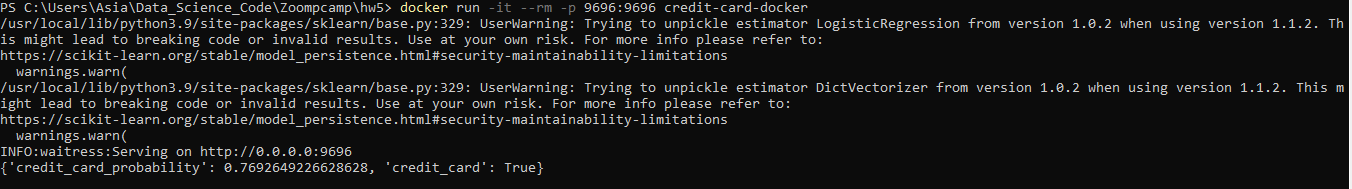

In [15]:
from IPython import display
display.Image(r"C:\Users\Asia\Downloads\sn2.PNG")